## Standaryzacja <a name="standardization"></a>

In [1]:
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import seaborn as sns
from sklearn import preprocessing

from sklearn import cluster, datasets, mixture
from sklearn import preprocessing

import numpy as np
import pandas as pd

In [2]:
x1 = np.concatenate((np.random.normal(150, 5, 400), 
                     np.random.normal(100, 5, 300),
                     np.random.normal(50, 5, 300)),
                    axis=None)
x2 = np.concatenate((np.random.normal(200, 5, 400), 
                     np.random.normal(150, 5, 300),
                     np.random.normal(100, 5, 300)),
                    axis=None)
x3 = np.random.normal(10000, 1000, 1000)

df = pd.DataFrame({'X1': x1,'X2': x2,'X3': x3})
df.head()

,X1,X2,X3
0,152.483011,199.690344,9553.228621
1,146.852569,205.998033,9000.796614
2,155.116982,195.867418,11201.483808
3,140.706604,208.085775,8387.627827
4,156.779266,199.992460,9900.114338


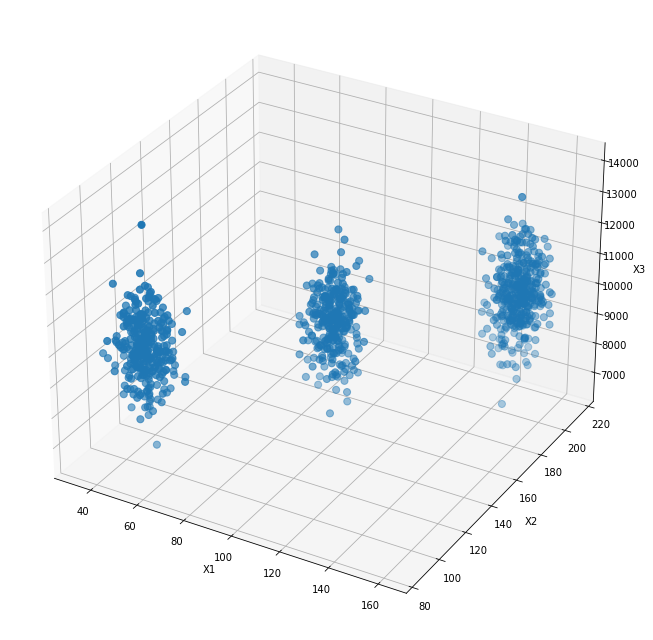

In [3]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.X1, df.X2, df.X3, s=50)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

plt.tight_layout()
plt.show()


<AxesSubplot:>

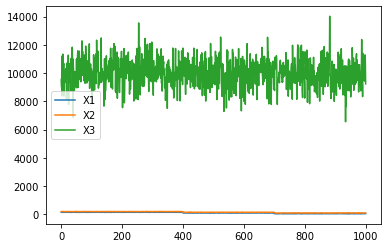

In [4]:
df.plot()

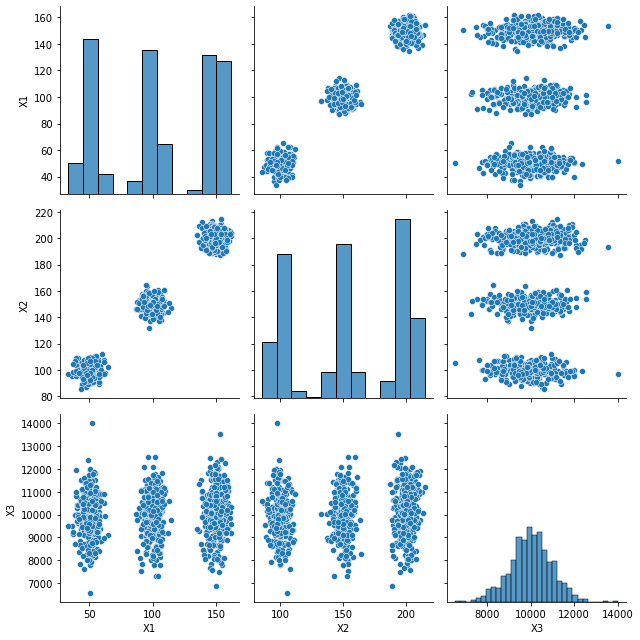

In [5]:
sns.pairplot(df, height=3)
plt.tight_layout()

In [6]:
def _KMeans(X, n_clusters):
    kmeans = cluster.KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    return X, kmeans

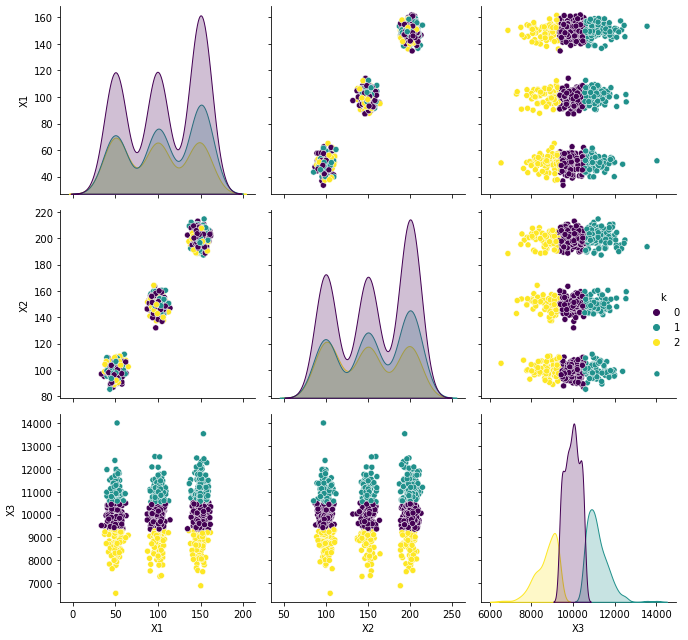

In [7]:
df['k']= hue=_KMeans(df, 3)[1].predict(df)

sns.pairplot(df, height=3, hue='k', palette='viridis')
plt.tight_layout()

In [8]:
std_scale = preprocessing.StandardScaler().fit(df.iloc[:,[0,1,2]])
df_std = pd.DataFrame(std_scale.transform(df.iloc[:,[0,1,2]]), columns=["X1", "X2", "X3"])

df_std.head()

,X1,X2,X3
0,1.136481,1.068798,-0.499477
1,1.001943,1.219341,-1.078238
2,1.199419,0.977558,1.227335
3,0.855087,1.269169,-1.720631
4,1.239138,1.076009,-0.136058


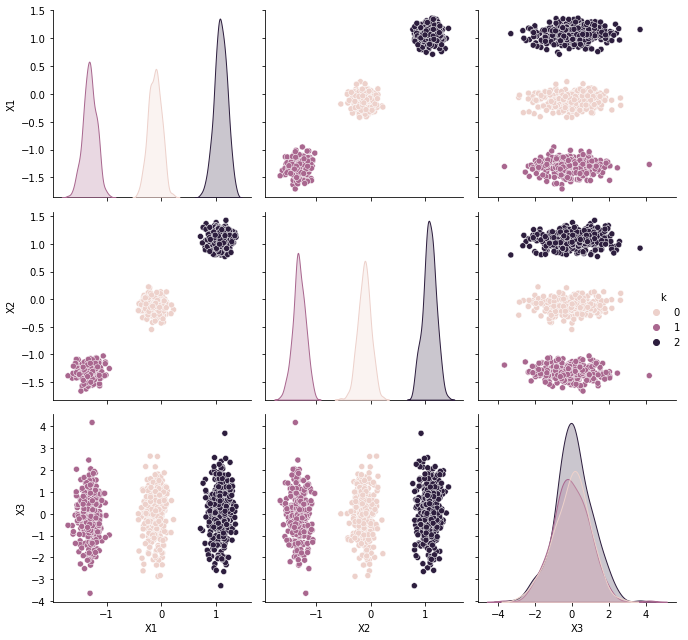

In [9]:
df_std['k']= hue=_KMeans(df_std, 3)[1].predict(df_std)

sns.pairplot(df_std, height=3, hue='k')
plt.tight_layout()

Więcej:
https://sebastianraschka.com/Articles/2014_about_feature_scaling.html